In [1]:
import tkinter as tk
from tkinter import *

# Data Analysis
import pandas as pd
import numpy as np

# Statistical Analysis
import scipy.stats as stats

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [18]:
df = pd.read_csv("data.csv")
df.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN


In [3]:
# drop cột ID
df.drop(['id','diagnosis'],axis=1,inplace=True)
# drop cột cuối cùng (Unnamed: 32)
df = df.iloc[: , :-1]
df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


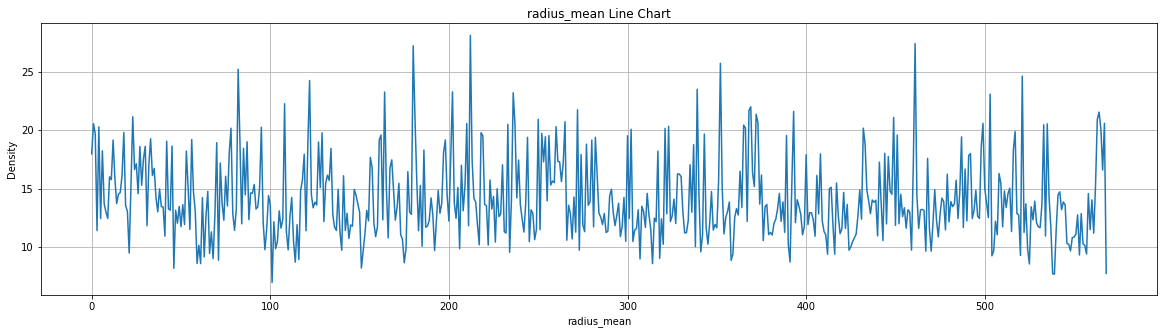

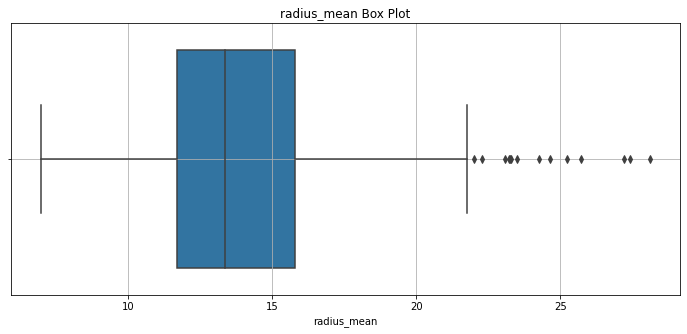

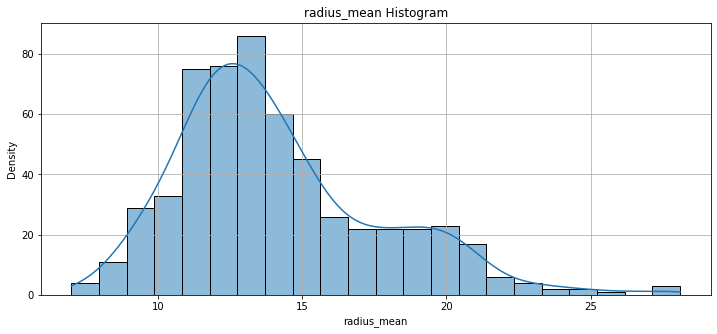

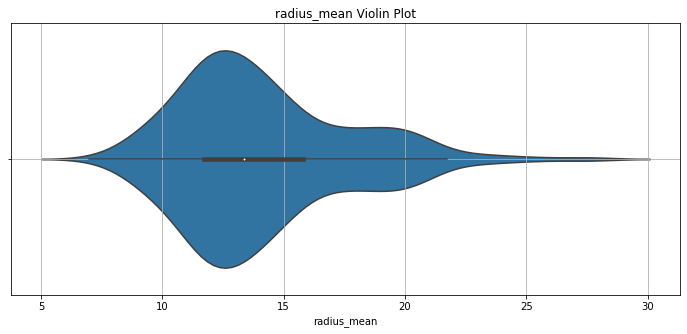

Text(0, 0.5, 'Cumulative Frequency')

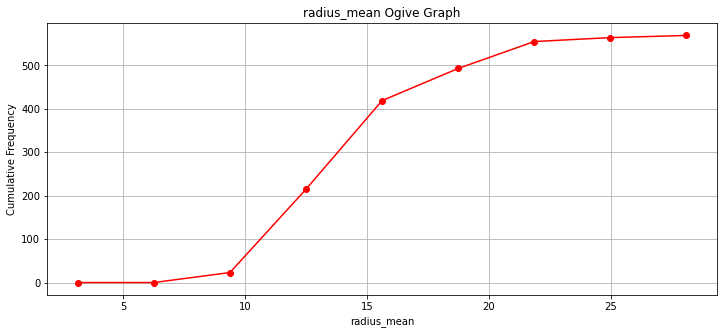

In [35]:
field = 'radius_mean'

plt.figure(figsize=(20,5))
df[field].plot()
plt.grid()
plt.xlabel(field)
plt.ylabel('Density')
plt.title(f'{field} Line Chart')
plt.show()

plt.figure(figsize=(12,5))
sns.boxplot(x=df[field])
plt.grid()
plt.xlabel(field)
plt.title(f'{field} Box Plot')
plt.show()

plt.figure(figsize=(12,5))
sns.histplot(x=df[field],kde=True)
plt.grid()
plt.xlabel(field)
plt.ylabel('Density')
plt.title(f'{field} Histogram')
plt.show()

plt.figure(figsize=(12,5))
sns.violinplot(x=df[field])
plt.grid()
plt.xlabel(field)
plt.title(f'{field} Violin Plot')
plt.show()
    
plt.figure(figsize=(12,5))
# calculating frequency and class interval
values, base = np.histogram(df['radius_mean'], bins=np.linspace(0,df['radius_mean'].max(),10))
# calculating cumulative sum
cumsum = np.cumsum(values)
# plotting  the ogive graph
plt.plot(base[1:], cumsum, color='red', marker='o', linestyle='-')
# formatting
plt.grid()
plt.title(f'{field} Ogive Graph')
plt.xlabel(field)
plt.ylabel('Cumulative Frequency')

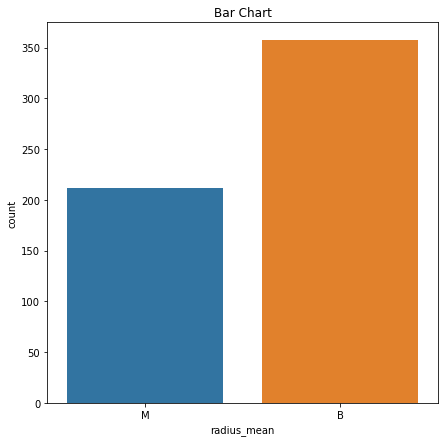

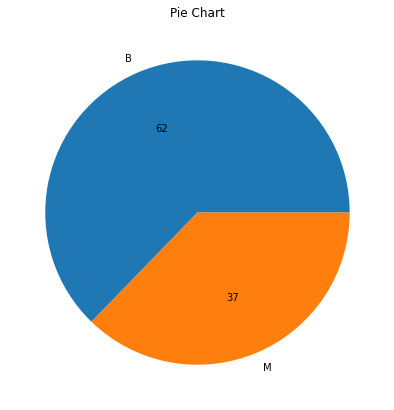

In [34]:
plt.figure(figsize=(7,7))
sns.countplot(x=df['diagnosis'])
plt.xlabel(field)
plt.title('Bar Chart')
plt.show()

value_counts = df['diagnosis'].value_counts()
plt.figure(figsize=(7,7))
plt.pie(value_counts,autopct='%d',labels=value_counts.index)
plt.title('Pie Chart')
plt.show()

In [ ]:
# master = tk.Tk()

# scrollbar = Scrollbar(master)
# scrollbar.grid(row=0,column=6)

# row = 0
# column = 0

# figure = plt.Figure(figsize=(5,5), dpi=100)
# ax = figure.add_subplot(111)
# bar = FigureCanvasTkAgg(figure, master)
# bar.get_tk_widget().grid(row=row,column=column)

# mainloop()

In [62]:
y = df['diagnosis']
X = df.drop('diagnosis',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40)

In [63]:
classifier = KNeighborsClassifier(n_neighbors = 8)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [64]:
y_pred = classifier.predict(X_test)
y_pred

array(['B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M',
       'B', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'M',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B',
       'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M',
       'B', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
       'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M

In [10]:
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

NameError: name 'y_test' is not defined